<a href="https://colab.research.google.com/github/perskine/githubtesttwo/blob/master/evidently.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This notebook will be used to practise show how the evidently library works

In [1]:
## Import the libraries for the work

import pandas as pd
import numpy as np
from scipy.stats import gaussian_kde

import xgboost as xgb
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [3]:
## Read in the dataset and how the head
mydata = pd.read_csv("/content/kc_house_data.csv")
mydata.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [4]:
## Show the contents of the dataset

mydata.info(verbose= True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
## format the dataset
mydata[['grade','view','waterfront']] = mydata[['grade','view','waterfront']].astype('object')
mydata.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [6]:
## Check the data type again after conversion

mydata.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  object 
 9   view           21613 non-null  object 
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  object 
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [7]:
## pick the variables for this work

features = ['sqft_living','grade','sqft_above', 'sqft_living15','bathrooms','view','sqft_basement','lat','long','waterfront','yr_built','bedrooms']


# Data Preparation

In [8]:
## Split the dataset into two

ref_data =mydata[:15000]
prod_data = mydata[15000:]

ref_data.shape , prod_data.shape

((15000, 21), (6613, 21))

In [10]:
## check the highest and the lowest price of the price of the home

print(f'lowest price: {np.min(mydata["price"])}, highest price: {np.max(mydata["price"])}')

lowest price: 75000.0, highest price: 7700000.0


(array([1.536e+03, 6.376e+03, 5.502e+03, 3.547e+03, 2.060e+03, 1.042e+03,
        4.280e+02, 3.120e+02, 2.260e+02, 1.400e+02, 1.260e+02, 7.800e+01,
        4.800e+01, 3.000e+01, 3.400e+01, 3.200e+01, 1.700e+01, 1.200e+01,
        1.500e+01, 1.400e+01, 6.000e+00, 1.000e+01, 1.000e+00, 6.000e+00,
        3.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 2.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([  75000.,  227500.,  380000.,  532500.,  685000.,  837500.,
         990000., 1142500., 1295000., 1447500., 1600000., 1752500.,
        1905000., 2057500., 2210000., 2362500., 2515000., 2667500.,
        2820000., 2972500., 3125000., 3277500., 3430000., 3582500.,
        3735000., 3887500., 4040000., 4192500., 4345000., 4497500.,
        4650000., 4802500., 4955000.

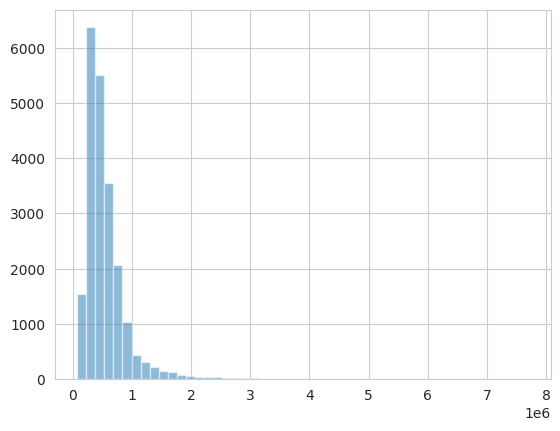

In [11]:
## Show the histogram of the price for distribution

frequency, bins = np.histogram(mydata['price'], bins=50, range=[np.min(mydata['price']), np.max(mydata['price'])])
plt.hist(mydata['price'], alpha=0.5, bins=bins, label='true')

From the graph above , we can see that there are a few houses that have very expensive. Also one can see that this distribution is normally distributed


(array([5.000e+00, 1.300e+01, 7.000e+00, 1.400e+01, 2.400e+01, 4.000e+01,
        4.400e+01, 9.500e+01, 1.480e+02, 2.060e+02, 3.830e+02, 5.590e+02,
        8.950e+02, 9.020e+02, 1.238e+03, 1.308e+03, 1.375e+03, 1.316e+03,
        1.617e+03, 1.567e+03, 1.337e+03, 1.622e+03, 1.269e+03, 1.122e+03,
        9.950e+02, 8.830e+02, 6.590e+02, 5.100e+02, 2.700e+02, 2.190e+02,
        2.230e+02, 1.810e+02, 1.170e+02, 1.250e+02, 8.700e+01, 5.000e+01,
        5.300e+01, 4.100e+01, 2.600e+01, 2.300e+01, 1.900e+01, 1.000e+01,
        5.000e+00, 1.000e+00, 3.000e+00, 2.000e+00, 2.000e+00, 0.000e+00,
        1.000e+00, 2.000e+00]),
 array([11.22525673, 11.31788621, 11.4105157 , 11.50314518, 11.59577467,
        11.68840415, 11.78103364, 11.87366313, 11.96629261, 12.0589221 ,
        12.15155158, 12.24418107, 12.33681056, 12.42944004, 12.52206953,
        12.61469901, 12.7073285 , 12.79995798, 12.89258747, 12.98521696,
        13.07784644, 13.17047593, 13.26310541, 13.3557349 , 13.44836439,
        13.

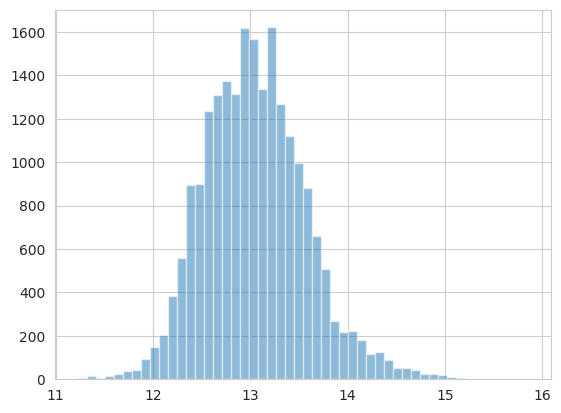

In [12]:
## Log the price and show the distribution again

frequency, bins = np.histogram(np.log1p(mydata['price']), bins=50, range=[np.min(np.log1p(mydata['price'])), np.max(np.log1p(mydata['price']))])
plt.hist(np.log1p(mydata['price']), alpha=0.5, bins=bins, label='true')

 * Now the distribution is more normally, we will use the log-transformation of the price as our target variable





In [13]:
# Create the dataset with the variables we are interested in using

mydata[features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sqft_living    21613 non-null  int64  
 1   grade          21613 non-null  object 
 2   sqft_above     21613 non-null  int64  
 3   sqft_living15  21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   view           21613 non-null  object 
 6   sqft_basement  21613 non-null  int64  
 7   lat            21613 non-null  float64
 8   long           21613 non-null  float64
 9   waterfront     21613 non-null  object 
 10  yr_built       21613 non-null  int64  
 11  bedrooms       21613 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 2.0+ MB


In [14]:
# Find out the number of columns we are going to use

print(f'Number of input columns: {len(features)}')

Number of input columns: 12


* There are no mising values in the data
* Now, plot the distributions of the input varibales

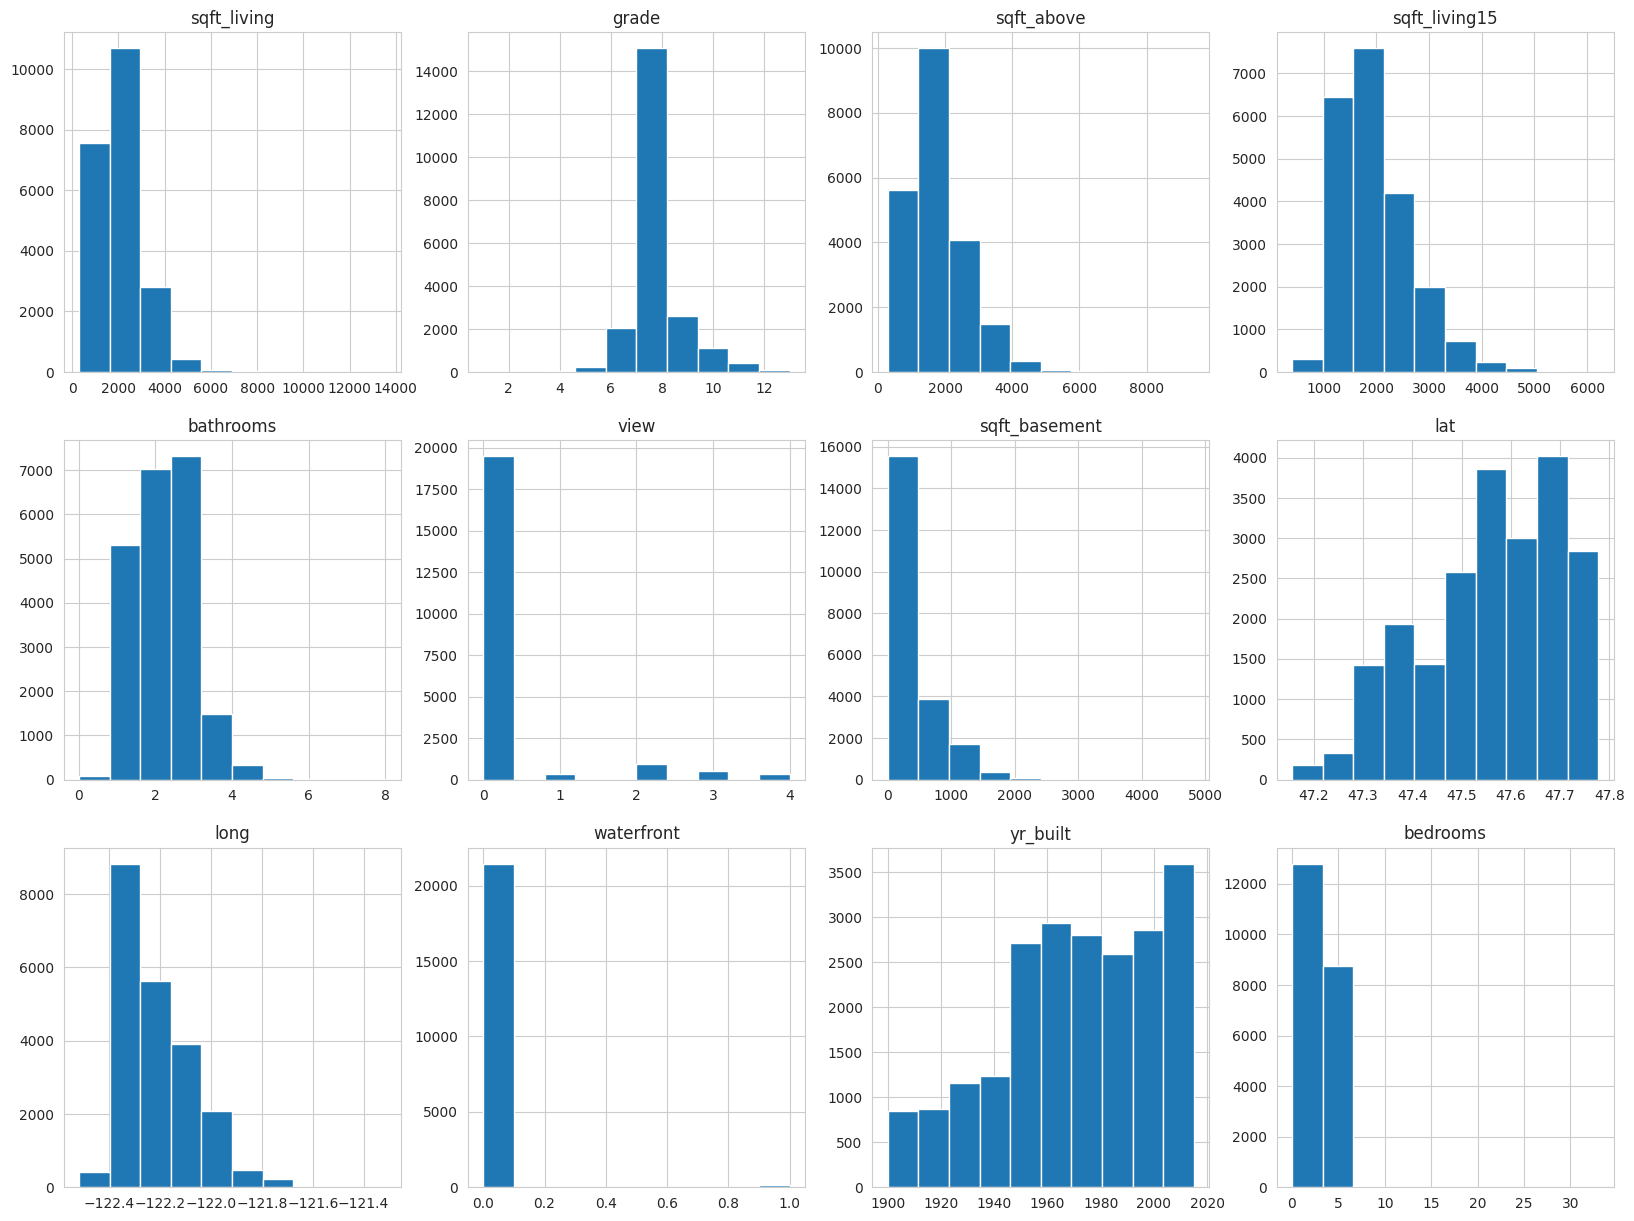

In [18]:
# Plot a graph of all the variables to show their distribution

fig, axis = plt.subplots(3, 4, figsize=(20,15))
for i, ax in enumerate(axis.flat):
    ax.hist(mydata[features[i]])
    ax.set_title(features[i])


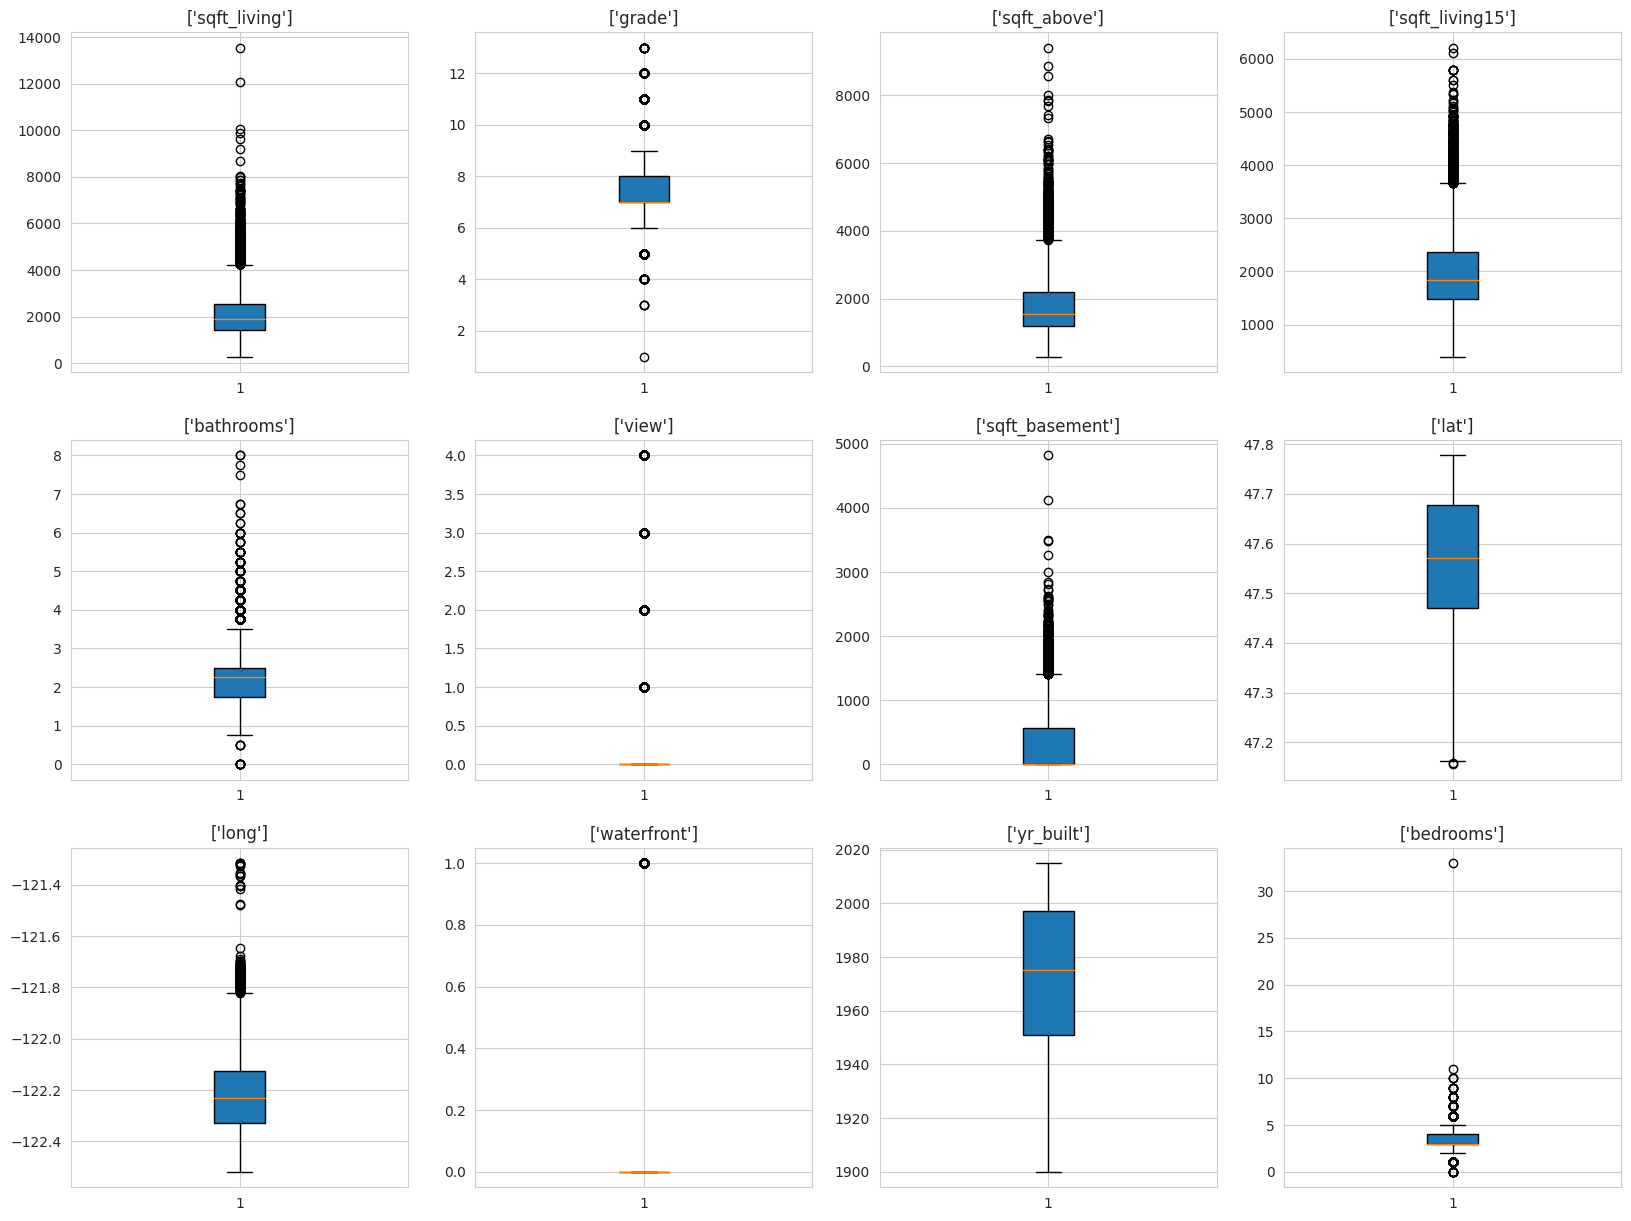

In [20]:
## Plot the

fig, axis = plt.subplots(3,4, figsize =(20,15))
for i , ax in enumerate(axis.flat):
  ax.boxplot(mydata[features[i]], patch_artist=True)
  ax.set_title([features[i]])

* We see that grade, view and waterfront are categorical variables.
* Bedrooms has an outlier. We will delete this entry

In [21]:
# Check the bedroom variable

mydata["bedrooms"].unique()

array([ 3,  2,  4,  5,  1,  6,  7,  0,  8,  9, 11, 10, 33])

In [23]:
# Delete entry with 33 bedrooms

mydata = mydata[mydata["bedrooms"] != 33]
mydata["bedrooms"].unique()

array([ 3,  2,  4,  5,  1,  6,  7,  0,  8,  9, 11, 10])

* Since grade, view and waterfront are categorical variable, we change their type to object

In [ ]:
mydata[['grade', 'view','waterfront']] = mydata[['grad','view','waterfront']]